In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

from scipy import optimize
from scipy import integrate

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Albania,India,Italy,Germany,US
0,2020-01-22,0,0,0,0,1
1,2020-01-23,0,0,0,0,1
2,2020-01-24,0,0,0,0,2
3,2020-01-25,0,0,0,0,2
4,2020-01-26,0,0,0,0,5


In [3]:
population_data = {'country': ['Albania', 'India', 'Italy', 'Germany', 'US'], 'population': [2877797, 1380004385, 60461826, 83783942, 331002651]}
population_df = pd.DataFrame(data=population_data)
population_df

,country,population
0,Albania,2877797
1,India,1380004385
2,Italy,60461826
3,Germany,83783942
4,US,331002651


In [4]:
population_df=population_df.set_index(['country']).T
population_df

country,Albania,India,Italy,Germany,US
population,2877797,1380004385,60461826,83783942,331002651


In [5]:
country_list = df_analyse.columns[1:]
country_list

Index(['Albania', 'India', 'Italy', 'Germany', 'US'], dtype='object')

In [6]:
def SIR_model(SIR,beta,gamma,N0):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [7]:
df_new = pd.DataFrame(columns = country_list,
                     index = ['N0', 'I0', 'S0', 'R0']) 
df_new.loc['N0'] = population_df.loc['population']
df_new.loc['I0'] = df_analyse.loc[75]
df_new.loc['S0'] = df_new.loc['N0'] - df_new.loc['I0']
df_new.loc['R0'] = 0

In [8]:
df_new

,Albania,India,Italy,Germany,US
N0,2877797,1380004385,60461826,83783942,331002651
I0,377,4778,132547,103374,367215
S0,2877420,1379999607,60329279,83680568,330635436
R0,0,0,0,0,0


In [9]:
df_new.dtypes

Albania    object
India      object
Italy      object
Germany    object
US         object
dtype: object

In [10]:
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

In [11]:
'''d = {}
for name in companies:
    d[name] = pd.DataFrame()'''

'd = {}\nfor name in companies:\n    d[name] = pd.DataFrame()'

In [12]:
propagation_rates = {}

for column in df_new:
   # Select column contents by column name using [] operator
    SIR=np.array([df_new[column].loc['S0'],df_new[column].loc['I0'],df_new[column].loc['R0']])

    propagation_rates[column] = pd.DataFrame(columns={'susceptible':df_new[column].loc['S0'],
                                        'infected':df_new[column].loc['I0'],
                                        'recovered':df_new[column].loc['R0']})
    
    for each_t in np.arange(100):
   
        new_delta_vec=SIR_model(SIR,beta,gamma,df_new[column].loc['N0'])
   
        SIR=SIR+new_delta_vec
    
        propagation_rates[column]=propagation_rates[column].append({'susceptible':SIR[0],
                                                    'infected':SIR[1],
                                                    'recovered':SIR[2]}, ignore_index=True)
    


In [13]:
SIR

array([5.10515068e+06, 2.31123931e+05, 3.25666376e+08])

In [14]:
#propagation_rates

In [15]:
for column in df_new:
    print(column)

Albania
India
Italy
Germany
US


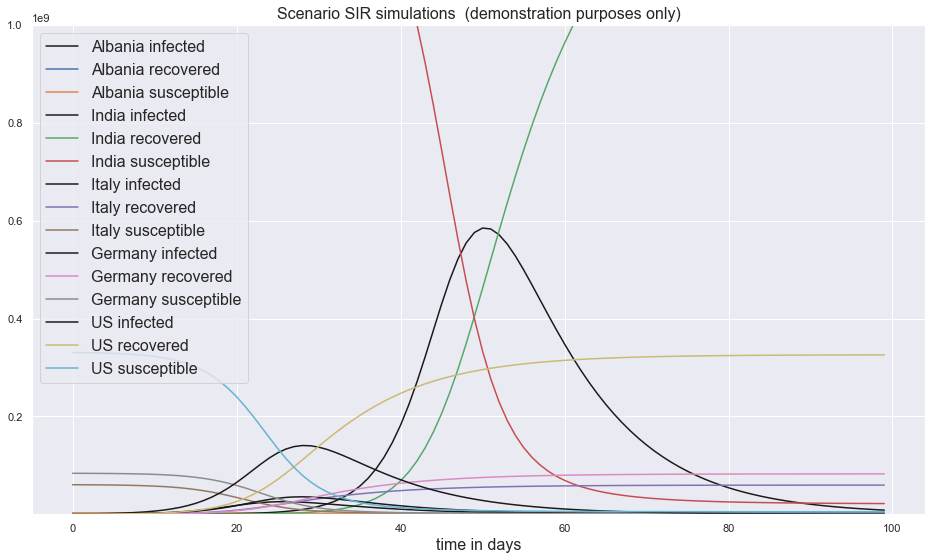

In [16]:
fig, ax1 = plt.subplots(1, 1)

for column in df_new:

    ax1.plot(propagation_rates[column].index,propagation_rates[column].infected,label=str(column)+' infected',color='k')
    ax1.plot(propagation_rates[column].index,propagation_rates[column].recovered,label=str(column)+' recovered')
    ax1.plot(propagation_rates[column].index,propagation_rates[column].susceptible,label=str(column)+' susceptible')

    ax1.set_ylim(10, 1000000000)
    ax1.set_yscale('linear')
    ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
    ax1.set_xlabel('time in days',size=16)
    ax1.legend(loc='best',
               prop={'size': 16});

## Fitting the parameters of SIR model

In [17]:
for column in df_analyse.columns[1:]:
    print(column)

Albania
India
Italy
Germany
US


In [18]:
ydata = []
t=[]
for column in df_analyse.columns[1:]:
    ydata.append(np.array(df_analyse[column][75:]))

t = np.arange(len(ydata[1]))

In [19]:
#ydata

In [20]:
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160])

In [21]:
ydata_df = pd.DataFrame(ydata,index=df_analyse.columns[1:]).T

In [22]:
ydata_df.head()

,Albania,India,Italy,Germany,US
0,377,4778,132547,103374,367215
1,383,5311,135586,107663,397992
2,400,5916,139422,113296,429686
3,409,6725,143626,118181,464442
4,416,7598,147577,122171,497943


In [23]:
optimized_df = pd.DataFrame(columns = country_list,
                     index = ['opt_beta', 'opt_gamma', 'std_dev_error_beta', 'std_dev_error_gamma']) 

In [24]:
optimized_df

,Albania,India,Italy,Germany,US
opt_beta,NaN,NaN,NaN,NaN,NaN
opt_gamma,NaN,NaN,NaN,NaN,NaN
std_dev_error_beta,NaN,NaN,NaN,NaN,NaN
std_dev_error_gamma,NaN,NaN,NaN,NaN,NaN


In [25]:
def SIR_model_t(SIRN,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R,N=SIRN
    dS_dt=-beta*S*I/N          #S*I is the 
    dI_dt=beta*S*I/N-gamma*I
    dR_dt=gamma*I
    dN_dt=0
    return dS_dt,dI_dt,dR_dt,dN_dt

In [26]:
def fit_odeint(t, beta, gamma): #t==x?
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0, N0), t, args=(beta, gamma))[:,1] # we only would like to get dI

for i in range(N):
     t = Ridge(Xtrain, ytrain, .3)
     theta_Matrix.append(t)
theta_Matrix = np.array(theta_Matrix)

In [27]:
fit_ode_data = []
yd_data = []
t = []
popt_data = []
pcov_data = []
perr_data = []
fitted_final_data = []
#popt=[0.4,0.1]
for column in ydata_df:
    I0 = ydata_df[column].loc[0]
    N0 = population_df[column].loc['population']
    S0 = N0-I0
    R0 = 0
    t  = np.arange(len(ydata_df[column]))
    #print(I0,S0,R0,N0)
    #print(t)
    popt=[0.4,0.1]
    #yd = fit_odeint(t, *popt)
    #yd_data.append(yd)
    #fit_ode_data.append(np.array(fit_odeint(t, *popt)))
    fit_odeint(t, *popt)
    
    #t.append(np.arange(len(ydata_df[column])))
    fit_ode_data.append(np.array(fit_odeint(t, *popt)))
    #popt, pcov = optimize.curve_fit(fit_ode_data[0], t, ydata_df[column])
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata_df[column])
    perr = np.sqrt(np.diag(pcov))
    
    #fit_ode_data.append(np.array(fit_odeint(t, *popt)))
    #popt_data.append(np.array(popt))
    #pcov_data.append(np.array(pcov))
    #perr_data.append(np.array(perr))
    
    optimized_df.at['opt_beta', column] = popt[0]
    optimized_df.at['opt_gamma', column] = popt[1]
    optimized_df.at['std_dev_error_beta', column] = perr[0]
    optimized_df.at['std_dev_error_gamma', column] = perr[1]
    
    fitted = fit_odeint(t, *popt)
    fitted_final_data.append(np.array(fitted))
    #print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    #print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
#yd_data =  np.array(yd_data)
    

In [28]:
#fitted_final_data

In [29]:
optimized_df

,Albania,India,Italy,Germany,US
opt_beta,0.353312,0.657277,0.161337,0.181633,0.188669
opt_gamma,0.326042,0.605824,0.150361,0.171307,0.158131
std_dev_error_beta,0.00271509,0.00311595,0.00397925,0.00553402,0.00114256
std_dev_error_gamma,0.00293905,0.00300527,0.00371111,0.00528182,0.00107526


In [30]:
#fit_ode_data

In [31]:
#t

In [32]:
#popt_data

In [33]:
#pcov_data

In [34]:
#perr_data

In [35]:
fit_ode_data_df = pd.DataFrame(fit_ode_data,index=df_analyse.columns[1:]).T
#ydata_df = pd.DataFrame(ydata,index=df_analyse.columns[1:]).T

In [36]:
fit_ode_data_df.head()

,Albania,India,Italy,Germany,US
0,377.000000,4778.000000,132547.000000,103374.000000,3.672150e+05
1,508.864197,6449.614475,178728.276593,139456.227230,4.954198e+05
2,686.831277,8706.047641,240885.347466,188082.416090,6.682235e+05
3,927.003832,11751.894436,324451.605153,253572.263443,9.010090e+05
4,1251.095466,15863.321558,436632.773409,341699.406284,1.214358e+06


In [37]:
fitted_final_data_df = pd.DataFrame(fitted_final_data,index=df_analyse.columns[1:]).T

In [38]:
fitted_final_data_df.head()

,Albania,India,Italy,Germany,US
0,377.000000,4778.000000,132547.000000,103374.000000,367215.000000
1,387.401011,5030.261566,133958.566659,104421.506342,378515.123941
2,398.082285,5295.833313,135377.378191,105475.296640,390147.119318
3,409.050998,5575.416626,136803.266750,106535.304208,402119.725703
4,420.314485,5869.749760,138236.058621,107601.459388,414441.848284


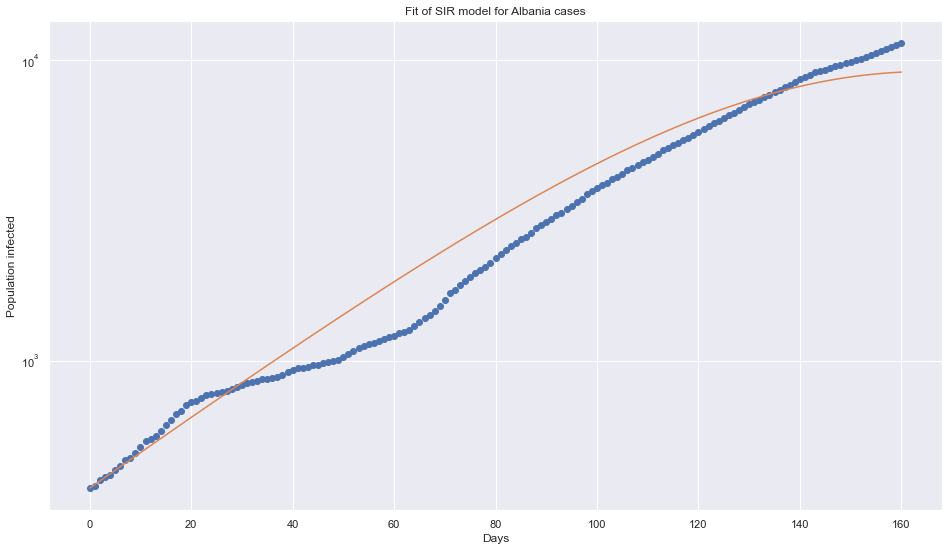

Optimal parameters: beta = 0.3533117504476172  and gamma =  0.3260420425161255
Basic Reproduction Number R0  1.0836386243965546
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


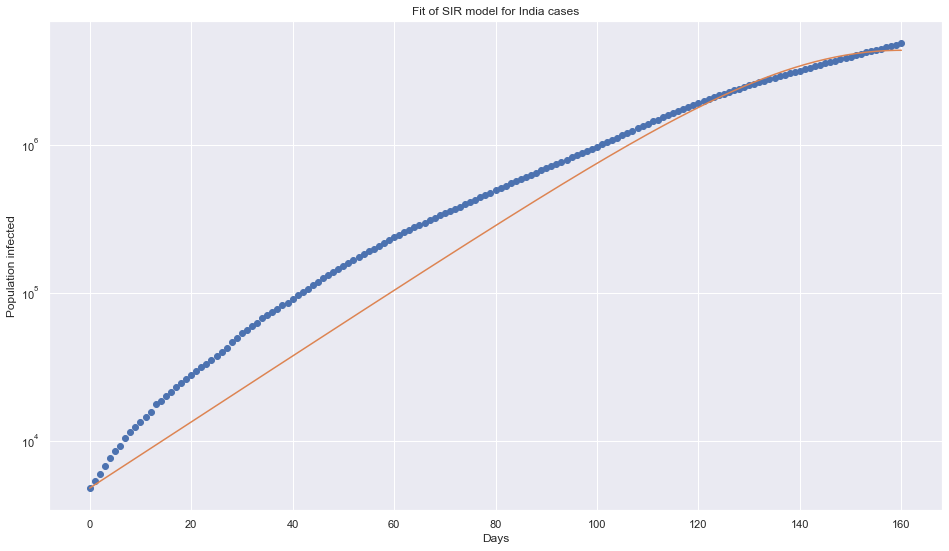

Optimal parameters: beta = 0.657276695693127  and gamma =  0.6058237240858909
Basic Reproduction Number R0  1.0849305987230393
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


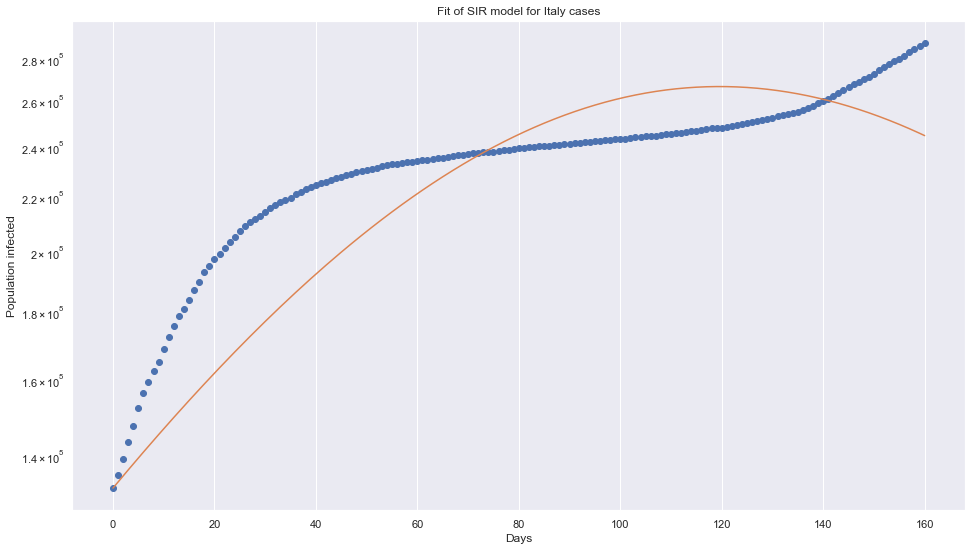

Optimal parameters: beta = 0.16133672200232949  and gamma =  0.15036121762446933
Basic Reproduction Number R0  1.0729942504540748
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


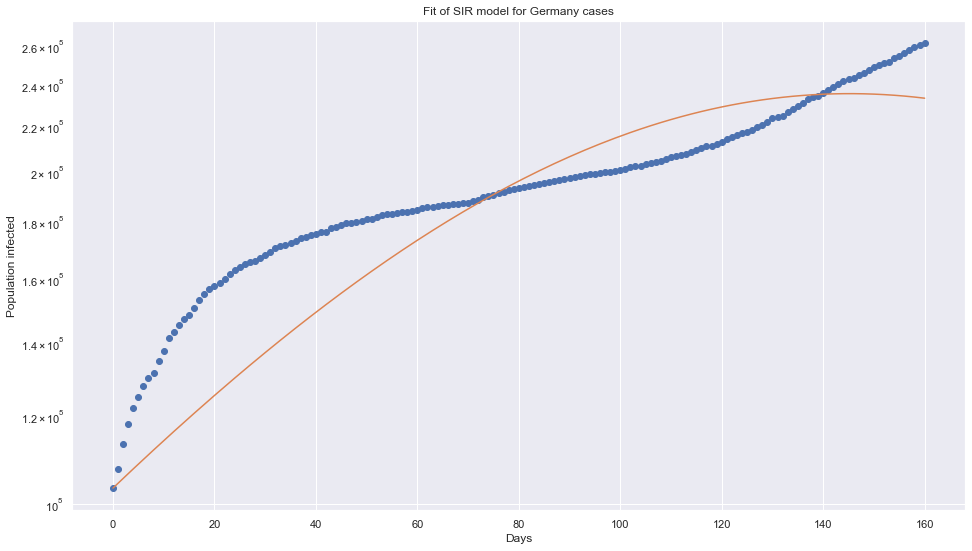

Optimal parameters: beta = 0.18163346079420142  and gamma =  0.17130679039738228
Basic Reproduction Number R0  1.060281734149967
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


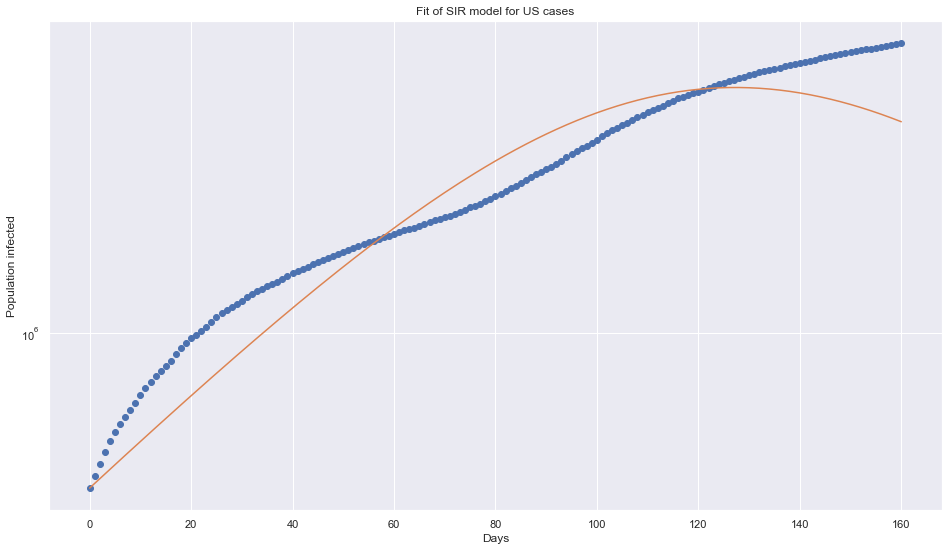

Optimal parameters: beta = 0.1886692359172087  and gamma =  0.15813148110921177
Basic Reproduction Number R0  1.1931162257748433
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [39]:
for column in fit_ode_data_df:    
    plt.semilogy(t, ydata_df[column], 'o')
    plt.semilogy(t, fitted_final_data_df[column])
    #plt.title("Fit of SIR model for Germany cases")
    plt.title("Fit of SIR model for "+str(column)+" cases")
    plt.ylabel("Population infected")
    plt.xlabel("Days")
    plt.show()
    print("Optimal parameters: beta =", optimized_df[column].loc['opt_beta'], " and gamma = ", optimized_df[column].loc['opt_gamma'])
    print("Basic Reproduction Number R0 " , optimized_df[column].loc['opt_beta']/ optimized_df[column].loc['opt_gamma'])
    print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")